<a href="https://colab.research.google.com/github/adam-bozman/RoboAdvisor/blob/main/M%26ARoboAdvisorAnalysis_070324_Outsample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT4's Predictive Capacity | Value Enhancing

## Outsample Setup

In [ ]:
# Load Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import re
from scipy import stats

In [ ]:
# Load the Excel file
file_path = "/content/drive/My Drive/RoboAdvisor/07_2024/MASample.xlsx"
sheet_name = 'outsampleresults'
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
df.head()

,Source.Name,dealno,anndate,Target,Acquirer,effdate,withdate,form,pct_cash,pct_other,...,Acquirer List,aCAR_MM_Window1_1_1,aCAR_MM_Window2_2_2,aCAR_RAW_Window1_1_1,aCAR_RAW_Window2_2_2,tCAR_MM_Window1_1_20,tCAR_MM_Window2_1_63,tCAR_RAW_Window1_1_20,tCAR_RAW_Window2_1_63,Prompt_1_Response
0,ValueEnhancingOutsample1.xlsx,3810227020,2021-10-01,Undisclosed Healthcare Co,i3 Verticals Inc,2021-10-01,NaT,Acq. of Assets,NaN,100.0,...,NaN,-0.059940,0.032039,-0.078940,0.022089,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: If i3 Verticals Inc ...
1,ValueEnhancingOutsample1.xlsx,3813311020,2021-10-01,Infinity Infusion Nursing LLC,Option Care Health Inc,2021-10-01,NaT,Acq. of Assets,NaN,100.0,...,NaN,0.030383,0.036801,0.020590,0.038199,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: If Option Care Healt...
2,ValueEnhancingOutsample1.xlsx,3854117020,2021-10-01,Luby's Inc-Re Ppty(26),Store Capital Corp,2021-10-01,NaT,Acq. of Assets,NaN,100.0,...,NaN,0.018915,0.002719,0.008299,0.002682,-0.074415,-0.285483,0.138843,0.202044,Decrease\n\n1. Acquisition Costs: The immediat...
3,ValueEnhancingOutsample1.xlsx,3809428020,2021-10-03,DentaQuest LLC,Sun Life Financial Inc,2022-06-01,NaT,Merger,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: Sun Life Financial I...
4,ValueEnhancingOutsample1.xlsx,3809885020,2021-10-04,"Elmira Savings Bank.Elmira,NY",Community Bank System Inc,2022-05-16,NaT,Merger,100.0,NaN,...,NaN,0.027443,0.015700,0.033977,0.018452,0.623178,0.545816,0.652974,0.638742,Increase\n\n1. Synergies: If Community Bank Sy...


## Functions to Parse Answers

In [ ]:
# Function to process each response
def process_response(response):
    # Initialize result dictionary
    result = {'Primary_Response': 'Invalid Response', 'Reasons': ''}

    # Strip leading/trailing whitespace and split response into lines
    lines = response.strip().split('\n')

    # Extract primary response
    if lines:
        primary_response = lines[0].strip().lower().replace('*', '')  # Remove asterisks and strip whitespace
        primary_response = primary_response.strip("'\"")  # Remove leading/trailing quotation marks
        if primary_response in ['increase', 'decrease', 'no change']:
            result['Primary_Response'] = primary_response.capitalize()

    # Extract reasons only if the primary response is valid
    if result['Primary_Response'] != 'Invalid Response':
        reasons = []
        for line in lines[1:]:
            cleaned_line = line.strip().replace('*', '')  # Remove asterisks and strip whitespace
            match = re.match(r'^\d+\.\s([^:]+):', cleaned_line)
            if match:
                reasons.append(match.group(1).strip())
        if reasons:
            result['Reasons'] = '; '.join(reasons)

    return result

In [ ]:
# Apply the function to the Prompt_1_Response column
df[['Primary_Response', 'Reasons']] = df['Prompt_1_Response'].apply(lambda x: pd.Series(process_response(x)))

In [ ]:
df.head()

,Source.Name,dealno,anndate,Target,Acquirer,effdate,withdate,form,pct_cash,pct_other,...,aCAR_MM_Window2_2_2,aCAR_RAW_Window1_1_1,aCAR_RAW_Window2_2_2,tCAR_MM_Window1_1_20,tCAR_MM_Window2_1_63,tCAR_RAW_Window1_1_20,tCAR_RAW_Window2_1_63,Prompt_1_Response,Primary_Response,Reasons
0,ValueEnhancingOutsample1.xlsx,3810227020,2021-10-01,Undisclosed Healthcare Co,i3 Verticals Inc,2021-10-01,NaT,Acq. of Assets,NaN,100.0,...,0.032039,-0.078940,0.022089,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: If i3 Verticals Inc ...,Increase,Synergies; Market Expansion; Cost Savings; Imp...
1,ValueEnhancingOutsample1.xlsx,3813311020,2021-10-01,Infinity Infusion Nursing LLC,Option Care Health Inc,2021-10-01,NaT,Acq. of Assets,NaN,100.0,...,0.036801,0.020590,0.038199,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: If Option Care Healt...,Increase,Synergies; Market Expansion; Cost Savings; Pos...
2,ValueEnhancingOutsample1.xlsx,3854117020,2021-10-01,Luby's Inc-Re Ppty(26),Store Capital Corp,2021-10-01,NaT,Acq. of Assets,NaN,100.0,...,0.002719,0.008299,0.002682,-0.074415,-0.285483,0.138843,0.202044,Decrease\n\n1. Acquisition Costs: The immediat...,Decrease,Acquisition Costs; Debt Increase; Integration ...
3,ValueEnhancingOutsample1.xlsx,3809428020,2021-10-03,DentaQuest LLC,Sun Life Financial Inc,2022-06-01,NaT,Merger,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Increase\n\n1. Synergies: Sun Life Financial I...,Increase,Synergies; Expansion of Services; Market React...
4,ValueEnhancingOutsample1.xlsx,3809885020,2021-10-04,"Elmira Savings Bank.Elmira,NY",Community Bank System Inc,2022-05-16,NaT,Merger,100.0,NaN,...,0.015700,0.033977,0.018452,0.623178,0.545816,0.652974,0.638742,Increase\n\n1. Synergies: If Community Bank Sy...,Increase,Synergies; Market Expansion; Economies of Scale


## Save the Output

In [ ]:
# Set path variables
path_to_google_drive = '/content/drive/My Drive/RoboAdvisor/07_2024/results/Cleaned/'
filename = 'ValueEnhancingResponses_Cleaned_Outsample.xlsx'

# Define global path
path = path_to_google_drive + filename

# Save the cleaned and updated dataframe to a new Excel file
df.to_excel(path, index=False)

## Statistical Significance & Accuracy of Responses

In [ ]:
# Filter out rows with empty CAR values
car_columns = ['aCAR_MM_Window1_1_1', 'aCAR_MM_Window2_2_2', 'aCAR_RAW_Window1_1_1', 'aCAR_RAW_Window2_2_2']
df = df.dropna(subset=car_columns)

In [ ]:
# Calculate average returns for each response category
response_groups = df.groupby('Primary_Response')[car_columns].mean()

In [ ]:
# Calculate statistical significance
response_results = {}
for response in df['Primary_Response'].unique():
    if response != 'Invalid Response':
        subset = df[df['Primary_Response'] == response]
        stats_results = {}
        for col in car_columns:
            stats_results[col] = {
                'mean': subset[col].mean(),
                'std': subset[col].std(),
                'count': subset[col].count(),
                't-stat': stats.ttest_1samp(subset[col].dropna(), 0).statistic,
                'p-value': stats.ttest_1samp(subset[col].dropna(), 0).pvalue
            }
        response_results[response] = stats_results

# Print the results
for response, results in response_results.items():
    print(f"Results for {response}:")
    for col, stats in results.items():
        print(f"  {col}: mean={stats['mean']}, std={stats['std']}, count={stats['count']}, t-stat={stats['t-stat']}, p-value={stats['p-value']}")

Results for Increase:
  aCAR_MM_Window1_1_1: mean=0.001230238499903204, std=0.07661233002469457, count=794, t-stat=0.4524815697069281, p-value=0.651045850030853
  aCAR_MM_Window2_2_2: mean=-0.004026309530512704, std=0.08754779851922008, count=794, t-stat=-1.2959020608867244, p-value=0.19538627778815434
  aCAR_RAW_Window1_1_1: mean=0.004053485814184523, std=0.0813560688110218, count=794, t-stat=1.403941312186003, p-value=0.16072782151646522
  aCAR_RAW_Window2_2_2: mean=0.0011499974106177963, std=0.09301569058854567, count=794, t-stat=0.3483781422212709, p-value=0.7276486802199625
Results for Decrease:
  aCAR_MM_Window1_1_1: mean=-0.0015943082576287296, std=0.09922257668631235, count=309, t-stat=-0.28244964569126646, p-value=0.7777884634867024
  aCAR_MM_Window2_2_2: mean=-0.004618015837929345, std=0.09634731346427422, count=309, t-stat=-0.8425487689824405, p-value=0.40013463417920336
  aCAR_RAW_Window1_1_1: mean=-0.0007421995661974351, std=0.10201031795421162, count=309, t-stat=-0.127895

## Functions to Aggregate Common Reasons/Terms

In [ ]:
# Load libraries
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Function to calculate reason frequencies
def calculate_reason_frequencies(reasons):
    all_reasons = '; '.join(reasons).split('; ')
    reason_freq = Counter(all_reasons)
    return reason_freq

# Function to plot word cloud
def plot_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

In [ ]:
# Separate data into value-enhancing and non-value-enhancing deals
value_enhancing = df[df['Primary_Response'] == 'Increase']
non_value_enhancing = df[df['Primary_Response'].isin(['Decrease', 'No change'])]

In [ ]:
# Calculate reason frequencies for each group
full_sample_reason_freq = calculate_reason_frequencies(df['Reasons'])
value_enhancing_reason_freq = calculate_reason_frequencies(value_enhancing['Reasons'])
non_value_enhancing_reason_freq = calculate_reason_frequencies(non_value_enhancing['Reasons'])

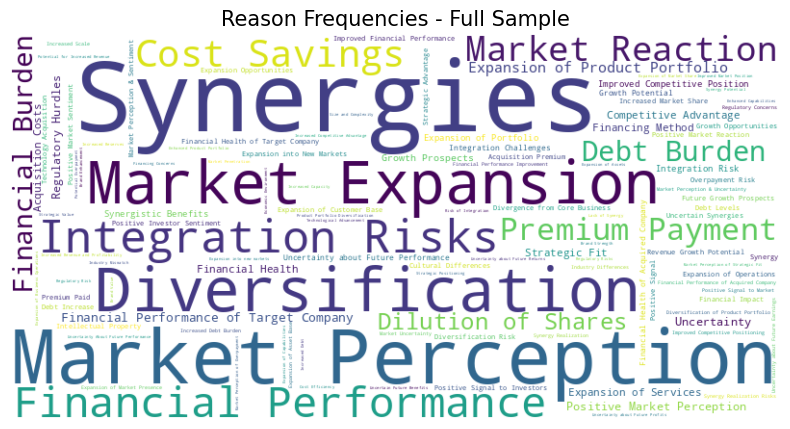

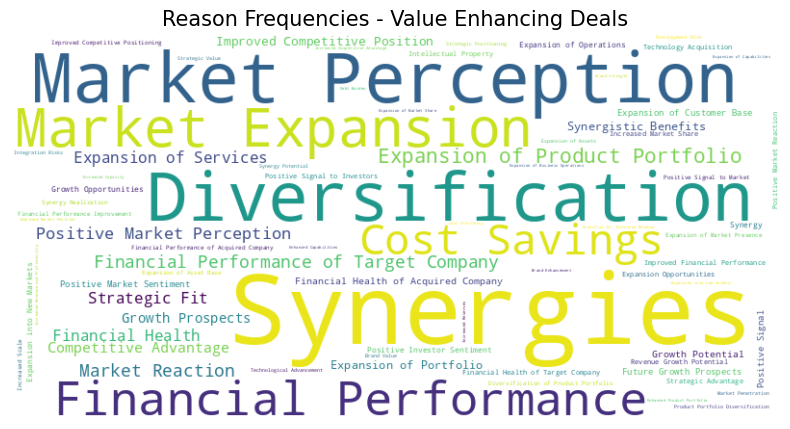

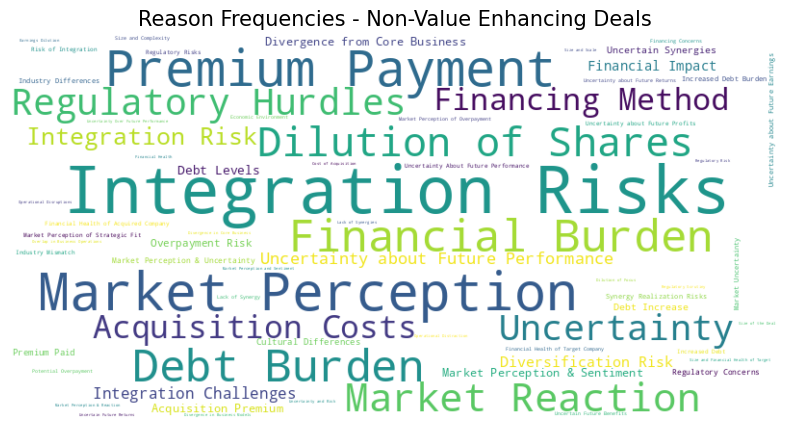

In [ ]:
# Plot word clouds for each group
plot_wordcloud(full_sample_reason_freq, 'Reason Frequencies - Full Sample')
plot_wordcloud(value_enhancing_reason_freq, 'Reason Frequencies - Value Enhancing Deals')
plot_wordcloud(non_value_enhancing_reason_freq, 'Reason Frequencies - Non-Value Enhancing Deals')

In [ ]:
# Optionally, print the most common reasons for each group
print("Most common reasons - Full Sample:", full_sample_reason_freq.most_common(20))
print("Most common reasons - Value Enhancing Deals:", value_enhancing_reason_freq.most_common(20))
print("Most common reasons - Non-Value Enhancing Deals:", non_value_enhancing_reason_freq.most_common(20))

Most common reasons - Full Sample: [('Synergies', 732), ('Market Perception', 460), ('Diversification', 294), ('Market Expansion', 281), ('Integration Risks', 243), ('Financial Performance', 209), ('Cost Savings', 164), ('Market Reaction', 162), ('Premium Payment', 136), ('Debt Burden', 108), ('Financial Burden', 104), ('Dilution of Shares', 88), ('Expansion of Product Portfolio', 87), ('Financial Performance of Target Company', 81), ('Regulatory Hurdles', 73), ('Positive Market Perception', 71), ('Uncertainty', 68), ('Strategic Fit', 60), ('Financial Health', 60), ('Expansion of Services', 58)]
Most common reasons - Value Enhancing Deals: [('Synergies', 732), ('Market Perception', 312), ('Diversification', 294), ('Market Expansion', 281), ('Financial Performance', 209), ('Cost Savings', 164), ('Expansion of Product Portfolio', 87), ('Financial Performance of Target Company', 80), ('Market Reaction', 78), ('Positive Market Perception', 71), ('Strategic Fit', 60), ('Expansion of Service

## Create a Dataframe of `Reasons`

In [ ]:
# Create a DataFrame for the most common reasons
common_reasons = list(set(list(full_sample_reason_freq.keys()) + list(value_enhancing_reason_freq.keys()) + list(non_value_enhancing_reason_freq.keys())))

data = {
    'Reason': common_reasons,
    'Full Sample': [full_sample_reason_freq.get(reason, 0) for reason in common_reasons],
    'Value Enhancing Deals': [value_enhancing_reason_freq.get(reason, 0) for reason in common_reasons],
    'Non-Value Enhancing Deals': [non_value_enhancing_reason_freq.get(reason, 0) for reason in common_reasons]
}

df_common_reasons = pd.DataFrame(data)
df_common_reasons = df_common_reasons.sort_values(by='Full Sample', ascending=False)

In [ ]:
# Display the DataFrame
df_common_reasons.head()

,Reason,Full Sample,Value Enhancing Deals,Non-Value Enhancing Deals
362,Synergies,732,732,0
234,Market Perception,460,312,148
186,Diversification,294,294,0
8,Market Expansion,281,281,0
92,Integration Risks,243,4,239


## Save the Output

In [ ]:
# Save the DataFrame to an Excel file
output_file_path = '/content/drive/My Drive/RoboAdvisor/07_2024/results/Cleaned/ValueEnhancingReasonsOutsample.xlsx'
df_common_reasons.to_excel(output_file_path, index=False)